# <font color='blue'>PROJECT 2 

#### Pre_Process_Data

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from  matplotlib.colors  import ListedColormap
from sklearn.ensemble import AdaBoostClassifier
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import confusion_matrix, classification_report


There are two CSV files Audit_Risk.csv and Trial.csv

In [7]:
audit=pd.read_csv('audit_risk.csv')
trial=pd.read_csv('trial.csv')

In [8]:
audit.drop(['Prob','Detection_Risk'],axis=1)
trial=trial.drop(['Sector_score', 'LOCATION_ID','PARA_A','SCORE_A','PARA_B','SCORE_B','Risk','TOTAL','numbers','History','Money_Value','Score'], axis=1)

In [9]:
#In order to merge, a new index column is added
audit['Project'] = audit.index.values
trial['Project'] = trial.index.values


In [10]:
df = pd.merge(audit,trial, on='Project', how='inner')

In [11]:
df.LOCATION_ID.replace(['LOHARU', 'NUH','SAFIDON'], [10, 26,45], inplace=True)

In [12]:
df['LOCATION_ID']=df['LOCATION_ID'].astype(int)

In [13]:
#Treating the outliners in the data
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

In [14]:
mask = ((df[['PARA_A', 'Score_A', 'PARA_B', 'Score_B','Inherent_Risk','Money_Value']] < (Q1 - 30 * IQR)) 
        | (df[['PARA_A', 'Score_A', 'PARA_B', 'Score_B','Inherent_Risk','Money_Value']] > (Q3 + 30 * IQR)))
#mask.sum()
df[mask]= np.NaN

In [15]:
df = df.dropna()

In [16]:
df=df.fillna(df.median())

In [17]:
df=df.drop(['Sector_score','LOCATION_ID','Project'],axis=1)

In [18]:
# split dataset ( Audit_Risk as target for regression)
from sklearn.model_selection import train_test_split
X = df.drop(['Audit_Risk','Risk'], axis = 1)
y = df['Audit_Risk']
X.columns
df.shape

(761, 31)

In [19]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [20]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### To reduce loss of information, we already treated outliners,so we used MinMaxScaler which essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).



# REGRESSION

Considering ``Audit Risk`` as the target column for classification tasks. 


### Apply any two models with bagging :

In [ ]:
ensemble = BaggingRegressor(DecisionTreeRegressor(),
                                n_jobs=-1,bootstrap=True,
                                random_state=0).fit(X_train, y_train)

pred = ensemble.predict(X_test)

In [ ]:
score_1 = ensemble.score(X_test, y_test)
score_1

In [ ]:
from sklearn.linear_model import Ridge

ensemble_2 = BaggingRegressor(Ridge(),
                                n_jobs=-1,bootstrap=True,
                                random_state=0).fit(X_train, y_train)

pred_2 = ensemble_2.predict(X_test)

In [ ]:
score_2 = ensemble_2.score(X_test, y_test)
score_2

### Two models with pasting :

For pasting, change argument to bootstrap=False.

In [ ]:
pasting = BaggingRegressor(DecisionTreeRegressor(),
                                n_jobs=-1,bootstrap=False,
                                random_state=0).fit(X_train, y_train)


In [ ]:
pred_paste = pasting.predict(X_test)
pred_paste

In [ ]:
score_paste = pasting.score(X_test, y_test)
score_paste

In [ ]:
pasting_2 = BaggingRegressor(Ridge(),
                                n_jobs=-1,bootstrap=False,
                                random_state=0).fit(X_train, y_train)


In [ ]:
pred_pasting_2 = pasting_2.predict(X_test)
pred_pasting_2 

In [ ]:
score_2_paste = pasting_2.score(X_test, y_test)
score_2_paste

### Apply any two models with adaboost boosting



ADABOOST

In [ ]:
test_score_list = []
best_score = 0
for n_estimators in [10, 50, 100]:
    for learning_rate in [0.1, 0.5, 1]:
        for n_neighbors in [1,2,3,4,5,6,7,8,9]:
            regr = AdaBoostRegressor(KNeighborsRegressor(n_neighbors=n_neighbors),n_estimators=n_estimators,learning_rate=learning_rate,random_state=0)
            regr.fit(X_train,y_train)
            score = regr.score(X_test, y_test)
            test_score_list.append(score)
            if score > best_score:
                best_score = score
                best_parameters = {'n_estimators': n_estimators , 'learning_rate' : learning_rate,'n_neighbors': n_neighbors}
                best_n = n_estimators
                best_learning_rate= learning_rate

In [ ]:
print(best_parameters)

KNeighborsRegressor(AdaBoostRegressor)

In [ ]:
# Fit regression mode(1)
regr_2 = AdaBoostRegressor(KNeighborsRegressor(n_neighbors = 5),n_estimators=10, learning_rate= 0.1,random_state=0)
regr_2.fit(X_train, y_train)
regr_2.score(X_test, y_test)

DecisionTreeRegressor(AdaBoostRegressor)

In [ ]:
# Fit regression mode(2)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=10, learning_rate= 0.1,random_state=0)
regr_2.fit(X_train, y_train)
regr_2.score(X_test, y_test) 

### Apply one model with gradient boosting

In [ ]:
clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)
# Make the prediction 
y_pred_gb = clf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)


In [ ]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_gb, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [ ]:
X_train.shape

## PCA

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components = .95)
pca.fit(X_train)

#pca.fit(y_train.reshape(1, -1))
#pca.fit(y_test.reshape(1, -1))

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

#y_train_reduced = pca.transform(y_train)
#y_test_reduced = pca.transform(y_test)

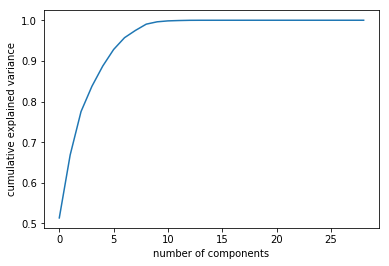

In [24]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [25]:
X_train_reduced.shape

(570, 7)

# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_reduced, y_train)
print(lreg.score(X_train_reduced, y_train))
print(lreg.score(X_test_reduced, y_test))

0.7315032159716541
0.7583806301522309


In [31]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
lreg_cv = LinearRegression()
scores = cross_val_score(lreg_cv, X_train_reduced, y_train, cv = kfold)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.58677573 0.69708798 0.69649603 0.69560111 0.70003426]
Average cross-validation score: 0.68


In [32]:
Regression_Scores={}

Regression_Scores.update({'Linear Regression': scores.mean()})

In [33]:
columns = ['Model_name','Model_params','Train_score','Test_score','Average Cross Validation Score','Best Parameters']
reg_model_para = pd.DataFrame(columns=columns)

reg_model_para = reg_model_para.append({'Model_name':'Linear Regression',
                                        'Model_params': '',
                                        'Train_score': lreg.score(X_train_reduced, y_train),
                                        'Test_score':lreg.score(X_test_reduced, y_test),
                       'Average Cross Validation Score':scores.mean(),
                       'Best Parameters':''},ignore_index=True)

In [34]:
reg_model_para

,Model_name,Model_params,Train_score,Test_score,Average Cross Validation Score,Best Parameters
0,Linear Regression,,0.731503,0.758381,0.675199,


# SVR Linear Regressor

In [ ]:
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

In [ ]:
#linear

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train_reduced, y_train)

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
xy = grid_search.best_params_
svr_linear = grid_search.best_score_

In [ ]:
Regression_Scores.update({'SVM Simple Regression':svr_linear})

In [ ]:
reg_model_para = reg_model_para.append({'Model_name':'SVR Linear Regressor',
                                        'Model_params': 'c'',''gamma',
                                        'Train_score': (grid_search.score(X_train_reduced, y_train)),
                                        'Test_score': (grid_search.score(X_test_reduced, y_test)),
                       'Average Cross Validation Score': svr_linear ,
                       'Best Parameters':xy},ignore_index=True)

In [ ]:
reg_model_para

In [ ]:
#rbf

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train_reduced, y_train)

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
yz = grid_search.best_params_

In [ ]:
Regression_Scores.update({'SVM RBF Kernel':scores.mean()})

In [ ]:
reg_model_para = reg_model_para.append({'Model_name':'SVR rbf kernal',
                                        'Model_params': 'c'',''gamma',
                                        'Train_score': (grid_search.score(X_train_reduced, y_train)),
                                        'Test_score': (grid_search.score(X_test_reduced, y_test)),
                       'Average Cross Validation Score': grid_search.best_score_ ,
                       'Best Parameters':yz},ignore_index=True)

In [ ]:
reg_model_para

# SVM poly regressor

In [ ]:
params_grid_2 = param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'degree': [1,2,3,4,5]}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
grid_search = GridSearchCV(SVR(kernel='poly'), param_grid=params_grid_2 , cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train_reduced, y_train)

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
zx = grid_search.best_params_

In [ ]:
Regression_Scores.update({'SVM poly Kernel':scores.mean()})

In [ ]:
reg_model_para = reg_model_para.append({'Model_name':'SVR poly kernal',
                                        'Model_params': 'degree',
                                        'Train_score': (grid_search.score(X_train_reduced, y_train)),
                                        'Test_score': (grid_search.score(X_test_reduced, y_test)),
                       'Average Cross Validation Score': grid_search.best_score_ ,
                       'Best Parameters':zx},ignore_index=True)

In [ ]:
reg_model_para

from sklearn.svm import SVR

train_score_list = []
test_score_list = []
gamma_plot = []
c_plot = []

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for kernel in ['rbf','linear']:
            svr = SVR(gamma=gamma, C=C)
            svr.fit(X_train_reduced,y_train)
            train_score_list.append(svr.score(X_train_reduced,y_train))
            score = svr.score(X_test_reduced, y_test)
            test_score_list.append(score)
            gamma_plot.append(gamma)
            c_plot.append(C)
            if score > best_score:
                best_score = score
                best_parameters = {'gamma': gamma , 'C' : C,'kernel':kernel}
                best_Gamma = gamma
                best_C = C
                best_kernel = kernel

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

svr_cv1 = SVR(gamma = 0.001, C = 100,kernel='rbf')
scores = cross_val_score(svr_cv1, X, y, cv = 5, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

# KNN Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 11))
param_grid = dict(n_neighbors=k_range)

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, return_train_score=True)

# rebuild a model on the combined training and validation set
grid_search.fit(X_train_reduced, y_train)

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))

In [ ]:
knn=KNeighborsRegressor(2)   
knn.fit(X_train_reduced,y_train)
train_score=knn.score(X_train_reduced,y_train)
test_score=knn.score(X_test_reduced,y_test)

print('Train score=',train_score,'Test score=',test_score)
scores = cross_val_score(knn, X_train_reduced, y_train, cv = 10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
reg_model_para = reg_model_para.append({'Model_name':'KNN Regression',
                                        'Model_params': 'n_neighbors',
                                        'Train_score':train_score,'Test_score':test_score,
                       'Average Cross Validation Score':grid_search.best_score_,
                       'Best Parameters':grid_search.best_params_},ignore_index=True)

In [ ]:
reg_model_para

#  Ridge

In [ ]:
from sklearn.linear_model import Ridge

train = []
test= []

for alpha in [0.01, 0.1, 1, 10, 100]: 
    #create the model 
    ridge = Ridge(alpha = alpha)
    
    #train the model
    ridge.fit(X_train_reduced, y_train)
    
    #evalutation
    train.append(ridge.score(X_train_reduced,y_train))
    test.append(ridge.score(X_test_reduced, y_test))

In [ ]:
%matplotlib inline

plt.plot([0.01, 0.1, 1, 10, 100], train, label = 'Train score')
plt.plot([0.01, 0.1, 1, 10, 100], test, label = 'Test score')

plt.legend()
plt.xlabel('Alpha')

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
rdg_reg = Ridge()
clf = GridSearchCV(rdg_reg,params,cv=5,verbose = 1, scoring = 'neg_mean_squared_error')
clf.fit(X_train_reduced,y_train)

clf.best_params_

In [ ]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train_reduced,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test_reduced, y_test)))
train_score_list = []
test_score_list = []
train_score_list.append(ridge.score(X_train_reduced,y_train))
test_score_list.append(ridge.score(X_test_reduced, y_test))


In [ ]:
Regression_Scores.update({'Ridge':scores.mean()})

In [ ]:
reg_model_para = reg_model_para.append({'Model_name':'Ridge',
                                        'Model_params': 'alpha',
                                        'Train_score': ridge.score(X_train_reduced,y_train),'Test_score':ridge.score(X_test_reduced,y_test),
                       'Average Cross Validation Score':grid_search.best_score_,
                       'Best Parameters':clf.best_params_},ignore_index=True)

In [ ]:
reg_model_para

In [ ]:
from  sklearn.linear_model import Ridge

x_range = [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    train_score_list.append(ridge.score(X_train_reduced,y_train))
    test_score_list.append(ridge.score(X_test_reduced, y_test))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [ ]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 10000).reshape(-1,1)
x_range2 = np.linspace(1, 100000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,6):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.01, xmax=999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

params={'alpha': [0.01, 0.1, 1, 10, 100]}
Lasso_reg = Lasso()
clf = GridSearchCV(Lasso_reg,params,cv=5,verbose = 1, scoring = 'neg_mean_squared_error')
clf.fit(X_train_reduced,y_train)

zz = clf.best_params_
zz

In [ ]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train_reduced,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test_reduced,y_test)))

In [ ]:
Regression_Scores.update({'Lasso Regression':grid_search.best_score_})

In [ ]:
reg_model_para = reg_model_para.append({'Model_name':'Lasso',
                                        'Model_params': 'alpha',
                                        'Train_score': lasso.score(X_train_reduced,y_train),'Test_score':lasso.score(X_test_reduced,y_test),
                       'Average Cross Validation Score':grid_search.best_score_,
                       'Best Parameters':zz},ignore_index=True)

In [ ]:
reg_model_para

In [ ]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,6):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Poly

Best parameters: {'N': 2}
Best score: 0.90


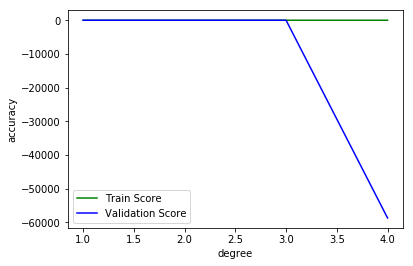

In [35]:
from  sklearn.preprocessing  import PolynomialFeatures

train_score_list = []
valid_score_list = []

best_score = 0

for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_reduced)
    X_valid_poly = poly.transform(X_test_reduced)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    score = lreg.score(X_valid_poly, y_test)
    valid_score_list.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'N': n}
            best = n

%matplotlib inline

x_axis = range(1,5)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, valid_score_list, c = 'b', label = 'Validation Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

print("Best parameters: {}".format(best_parameters))
print("Best score: {:.2f}".format(best_score))

In [36]:
poly_grid = PolynomialFeatures(best)

X_train_poly = poly_grid.fit_transform(X_train_reduced)

scores = cross_val_score(LinearRegression(), X_train_poly, y_train, cv = 5, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.80477602  0.92289898  0.92864302 -2.81179442  0.87326579]
Average cross-validation score: 0.14


In [ ]:
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(5)}

grid_search = GridSearchCV(PolynomialRegression(), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

df = pd.DataFrame(grid_search.cv_results_)
%matplotlib inline
x_axis = range(1,6)
plt.plot(x_axis, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('degree')
plt.ylabel('MSE')

print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



In [ ]:
Regression_Scores.update({'Polynomial Regression':scores.mean()})

In [ ]:
train_score_list = []
test_score_list = []

for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_reduced)
    X_test_poly = poly.transform(X_test_reduced)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    
print(train_score_list)
print(test_score_list)

In [ ]:
reg_model_para = reg_model_para.append({'Model_name':'Poly regressor',
                                        'Model_params': 'degree',
                                        'Train_score': train_score_list[1],'Test_score':test_score_list[1],
                       'Average Cross Validation Score':grid_search.best_score_,
                       'Best Parameters':'{degree:2}'},ignore_index=True)
                                        


In [ ]:
reg_model_para

# Simple neural network model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train_reduced.shape

In [ ]:
#step 1: build the model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 7, activation = 'sigmoid'))
#hidden layer
#output layer: no activation function
model1.add(Dense(1))

#step 2: compile the model
model1.compile(loss = 'mse', optimizer = 'sgd', metrics = ['mse'])

#step 3: train the model
model1.fit(X_train_reduced,y_train, epochs = 200, batch_size = 100)

#step 4: model evaluation

In [ ]:
model1.evaluate(X_train_reduced, y_train)

In [ ]:
model1.evaluate(X_test_reduced, y_test)

In [ ]:
from sklearn.metrics import r2_score
y_pred = model1.predict(X_train_reduced)

In [ ]:
y_train_pred =  y_pred.reshape(-1,1)
r2_score(y_train, y_train_pred)

In [ ]:
r2_score(y_test, model1.predict(X_test_reduced))

### REGRESSION COMPARISON 

In [ ]:
reg_model_para

In [ ]:
result_reg_project1=pd.read_csv('result_reg.csv')
result_reg_project1

# CLASSIFICATION

Considering ``Risk`` as the target column for classification tasks. 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons


In [ ]:
# split dataset (Risk as target for Classification)
from sklearn.model_selection import train_test_split
X = df.drop(['Audit_Risk','Risk'], axis = 1)
y = df['Risk']
X.columns
df.shape


In [ ]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# GradientBoostingClassifier

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

In [ ]:
%matplotlib notebook

y_list = gbrt.feature_importances_
y_pos = np.arange(len(y_list))
features = X.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

# Soft voting

In [ ]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(2)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 5, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


In [ ]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


# Bagging 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

In [ ]:
from  matplotlib.colors  import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

%matplotlib notebook

plot_decision_boundary(ada_clf, X_train, y_train)

In [ ]:
#bagging 2


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier(3)
bag_clf = BaggingClassifier(knn_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

# PASTING

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier(3)
bag_clf = BaggingClassifier(knn_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

%matplotlib notebook

plot_decision_boundary(ada_clf, X_train, y_train)

# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(X_train)
pca.fit(X_test)
#pca.fit(y_train.reshape(1, -1))
#pca.fit(y_test.reshape(1, -1))

In [ ]:
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)
#y_test_reduced = pca.transform(y_test)

In [ ]:
X_train_reduced.shape

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


# KNN classifier on reduced pca 

# GRID_SEARCH

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

train_array = []
test_array = []
x_axis = range(1,20)

for k in range(1,20):
    knn=KNeighborsClassifier(k)   
    knn.fit(X_train_reduced,y_train)
    train_score=knn.score(X_train_reduced,y_train)
    test_score=knn.score(X_test_reduced,y_test)
    train_array.append(train_score)
    test_array.append(test_score)

line1, = plt.plot(x_axis, train_array, c='g', label = 'Train')
line2, = plt.plot(x_axis, test_array, c='b', label = 'Test')
plt.axis()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(handles = [line1, line2],loc = 1)
plt.show()

In [ ]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train_reduced,y_train)


# KNN_ALGORITHIM

In [ ]:
knn=KNeighborsClassifier(9)   
knn.fit(X_train_reduced,y_train)
train_score=knn.score(X_train_reduced,y_train)
test_score=knn.score(X_test_reduced,y_test)
print('Train score=',train_score,'Test score=',test_score)


In [ ]:
k_range = list(range(1, 11))

param_grid = dict(n_neighbors=k_range)

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

df = pd.DataFrame(grid_search.cv_results_)
%matplotlib inline
x_axis = range(1,11)
plt.plot(x_axis, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, df.mean_test_score, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
scores = cross_val_score(knn, X, y, cv = 6)
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
pred_knn = knn.predict(X_test_reduced)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_knn)

print ('Recall    : {}'.format(recall[1]))

In [ ]:
from sklearn import metrics 

Classification_Scores={}

Classification_Scores.update({'KNN Classification':[metrics.accuracy_score(y_test,pred_knn),recall[1]]})

In [ ]:
columns = ['Classifier','Best Parameters','Accuracy_Score','Recall']
clf_model_para = pd.DataFrame(columns=columns)

clf_model_para=clf_model_para.append({'Classifier':'KNN Classification',
                                      'Best Parameters':grid_search.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_knn),
                                      'Recall':recall[1]},ignore_index=True)

# SVC LINEAR

# GRID_SEARCH

In [ ]:
from sklearn.svm import SVC

train_score_list = []
test_score_list = []

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc_lin = SVC(kernel='linear', gamma=gamma, C=C)
        svc_lin.fit(X_train_reduced,y_train)
        train_score_list.append(svc_lin.score(X_train_reduced,y_train))
        score = svc_lin.score(X_test_reduced, y_test)
        test_score_list.append(score)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma , 'C' : C}
            best_Gamma = gamma
            best_C = C

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
svm = SVC(**best_parameters)
svm.fit(X_train_reduced, y_train)
test_score = svm.score(X_test_reduced, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

In [ ]:
svc_lin_cv = SVC(kernel='linear',gamma = best_Gamma, C = best_C)
scores = cross_val_score(svc_lin_cv,X, y, cv = 5, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
pred_svm_lin = svc_lin.predict(X_test_reduced)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_svm_lin)

print ('Recall    : {}'.format(recall[1]))

In [ ]:
Classification_Scores.update({'Linear_SVC':[metrics.accuracy_score(y_test,pred_svm_lin),recall[1]]})

In [ ]:
clf_model_para=clf_model_para.append({'Classifier':'Linear_SVC',
                                      'Best Parameters':grid_search.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_svm_lin),
                                      'Recall':recall[1]},ignore_index=True)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
valid_score_l1 = []
valid_score_l2 = []

best_score = 0
l1 = 'l1'
l2 = 'l2'

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    
    log_l1.fit(X_train_reduced, y_train)
    log_l2.fit(X_train_reduced, y_train)
    
    train_score_l1.append(log_l1.score(X_train_reduced, y_train))
    train_score_l2.append(log_l2.score(X_train_reduced, y_train))
    
    score = log_l1.score(X_test_reduced, y_test)
    valid_score_l1.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'C': c , 'penalty': l1}
            best_C = c
            best_Penalty = 'l1'
    
    score = log_l2.score(X_test_reduced, y_test)
    valid_score_l2.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'C': c , 'penalty' : l2}
            best_C = c
            best_Penalty = 'l2'
    
plt.subplot(1,2,1)
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, valid_score_l1, label = 'Test score, penalty = l1')
plt.xscale('log')
plt.legend()
plt.subplot(1,2,2)
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, valid_score_l2, label = 'Test score, penalty = l2')
plt.xscale('log')
plt.legend()

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
log_grid = LogisticRegression(penalty = best_Penalty, C = best_C)

scores = cross_val_score(log_grid, X_train_reduced, y_train, cv =5, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
param_grid = {'penalty': ['l1','l2'],
             'C':  [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train_reduced, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred_log = grid_search.predict(X_test_reduced)
print(metrics.accuracy_score(y_test,pred_log))

confusion = confusion_matrix(y_test, pred_log)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test,pred_log))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_log)

print ('Recall    : {}'.format(recall[1]))

In [ ]:
Classification_Scores.update({'Logistic Classification':[metrics.accuracy_score(y_test,pred_log),recall[1]]})

In [ ]:
clf_model_para=clf_model_para.append({'Classifier':'Logistic Classification',
                                      'Best Parameters':grid_search.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_log),
                                      'Recall':recall[1]},ignore_index=True)

# SVC rbf

In [ ]:
from sklearn.svm import SVC

train_score_list = []
test_score_list = []

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc_rbf = SVC(kernel='rbf', gamma=gamma, C=C)
        svc_rbf.fit(X_train_reduced,y_train)
        train_score_list.append(svc_rbf.score(X_train_reduced,y_train))
        score = svc_rbf.score(X_test_reduced, y_test)
        test_score_list.append(score)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma , 'C' : C}
            best_Gamma = gamma
            best_C = C

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
svm = SVC(**best_parameters)
svm.fit(X_train_reduced, y_train)
test_score = svm.score(X_test_reduced, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

In [ ]:
svc_rbf_cv = SVC(kernel='rbf',gamma = best_Gamma, C = best_C)
scores = cross_val_score(svc_rbf_cv, X, y, cv = 6, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
pred_svm_rbf = svc_rbf.predict(X_test_reduced)

In [ ]:
Classification_Scores.update({'SVC RBF Kernel':[metrics.accuracy_score(y_test,pred_svm_rbf),recall[1]]})

In [ ]:
clf_model_para=clf_model_para.append({'Classifier':'SVC RBF Kernel',
                                      'Best Parameters':grid_search.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_svm_rbf),
                                      'Recall':recall[1]},ignore_index=True)

# svc_poly

In [ ]:
from sklearn.svm import SVC

train_score_list = []
test_score_list = []

best_score = 0

for degree in range(1,5):
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc_poly = SVC(kernel='poly', degree = degree, C=C, gamma = 'auto')
        svc_poly.fit(X_train_reduced,y_train)
        train_score_list.append(svc_poly.score(X_train_reduced,y_train))
        score = svc_poly.score(X_test_reduced, y_test)
        test_score_list.append(score)
        if score > best_score:
            best_score = score
            best_parameters = {'degree': degree , 'C' : C}
            best_Degree = degree
            best_C = C

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
svm = SVC(**best_parameters)
svm.fit(X_train_reduced, y_train)
test_score = svm.score(X_test_reduced, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

In [ ]:
svc_poly_cv = SVC(kernel='poly',degree = best_Degree, C=best_C, gamma = 'auto')
scores = cross_val_score(svc_poly_cv, X,y, cv = 6, scoring = 'r2')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
pred_svm_poly = svc_poly.predict(X_test_reduced)

In [ ]:
Classification_Scores.update({'SVC Poly Kernel':[metrics.accuracy_score(y_test,pred_svm_poly),recall[1]]})

In [ ]:
clf_model_para=clf_model_para.append({'Classifier':'SVC Poly Kernel',
                                      'Best Parameters':grid_search.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_svm_poly),
                                      'Recall':recall[1]},ignore_index=True)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train_reduced, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_reduced, y_test)))

In [ ]:
dtree_cv = DecisionTreeClassifier()
scores = cross_val_score(dtree_cv, X_train_reduced, y_train, cv = 5, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
pred_tree = dtree.predict(X_test_reduced)
print(metrics.accuracy_score(y_test,pred_tree))

confusion = confusion_matrix(y_test, pred_tree)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test,pred_tree))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_tree)

print ('Recall    : {}'.format(recall[1]))

In [ ]:
Classification_Scores.update({'Decison Tree':[metrics.accuracy_score(y_test,pred_tree),recall[1]]})

In [ ]:
clf_model_para=clf_model_para.append({'Classifier':'Decision Tree',
                                      'Best Parameters':' ',
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_tree),
                                      'Recall':recall[1]},ignore_index=True)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_tree)
print("Confusion matrix:\n{}".format(confusion))

# EVALUATION

In [ ]:
from sklearn.dummy import DummyClassifier

y2 = y == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

In [ ]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train_reduced, y_train)
pred_dummy = dummy.predict(X_test_reduced)
print("dummy score: {:.2f}".format(dummy.score(X_test_reduced, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train_reduced, y_train)
pred_logreg = logreg.predict(X_test_reduced)
print("logreg score: {:.2f}".format(logreg.score(X_test_reduced, y_test)))

In [ ]:
pred_knn = knn.predict(X_test_reduced)

In [ ]:
pred_svm_lin = svc_lin.predict(X_test_reduced)

In [ ]:
pred_svm_rbf = svc_rbf.predict(X_test_reduced)

In [ ]:
pred_svm_poly = svc_poly.predict(X_test_reduced)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

In [ ]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))
print("\nKNN")
print(confusion_matrix(y_test, pred_knn))
print("\nSVMLinear")
print(confusion_matrix(y_test, pred_svm_lin))
print("\nSVMrbf")
print(confusion_matrix(y_test, pred_svm_rbf))
print("\nSVMpoly")
print(confusion_matrix(y_test, pred_svm_poly))

In [ ]:
from sklearn.metrics import f1_score

print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))
print("f1 score KNN Classifier: {:.2f}".format(f1_score(y_test, pred_knn)))
print("f1 score Svc Linear: {:.2f}".format(f1_score(y_test, pred_svm_lin)))
print("f1 score Svc rbf: {:.2f}".format(f1_score(y_test, pred_svm_rbf)))
print("f1 score SVc poly: {:.2f}".format(f1_score(y_test, pred_svm_poly)))


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent, target_names=["No Risk", "Risk"]))


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_tree, target_names=["No Risk", "Risk"]))


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_logreg, target_names=["No Risk", "Risk"]))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_knn, target_names=["No Risk", "Risk"]))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svm_lin, target_names=["No Risk", "Risk"]))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svm_rbf, target_names=["No Risk", "Risk"]))


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svm_poly, target_names=["No Risk", "Risk"]))

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC

from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

svc = SVC(**best_parameters)
svc.fit(X_train_reduced, y_train)
test_score = svm.score(X_test_reduced, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

In [ ]:
%matplotlib inline

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test_reduced))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [ ]:
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train_reduced, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test_reduced)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [ ]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test_reduced))))

print("f1_score of svc: {:.3f}".format(f1_score(y_test, svm.predict(X_test_reduced))))

In [ ]:
%matplotlib inline


from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test_reduced))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show()

In [ ]:
%matplotlib inline

from sklearn.metrics import roc_auc_score
plt.figure()
for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train_reduced, y_train)
    accuracy = svc.score(X_test_reduced, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test_reduced))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test_reduced))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")
plt.show()

# Apply deep learning models

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 29, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 50, batch_size = 300)

#step 4: evaluation

In [ ]:
model1.evaluate(X_train, y_train)

In [ ]:
model1.evaluate(X_test, y_test)

# MLP

In [ ]:
#step 1: build model
model2 = Sequential()
#input layer
model2.add(Dense(20, input_dim = 29, activation = 'relu'))
#hidden layers
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
#output layer
model2.add(Dense(1, activation = 'sigmoid'))

#step 2: compile the model
model2.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model
model2.fit(X_train, y_train, epochs = 30, batch_size = 150)

#step 4: evaluate

In [ ]:
model2.evaluate(X_train, y_train)

In [ ]:
model2.evaluate(X_test, y_test)

# CLASSIFACTION COMPARISION

In [ ]:
clf_model_para

In [ ]:
result_classification_project1=pd.read_csv('result_classification.csv')
result_classification_project1